In [21]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.tree import DecisionTreeRegressor

In [22]:
df = pd.read_csv('../dataset/Position_Salaries.csv')

In [23]:
x = df[['Level']]
y = df['Salary']

In [24]:
reg = DecisionTreeRegressor()

In [25]:
reg.fit(x,y)

DecisionTreeRegressor()

In [26]:
reg.score(x,y)

1.0

In [27]:
ypred = reg.predict(x)
df['ypred'] = ypred

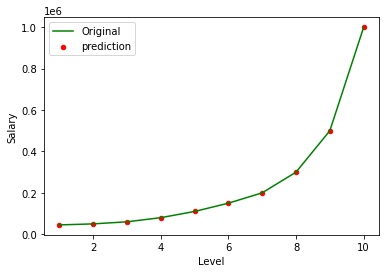

In [28]:
ax = df.plot.scatter(x= 'Level', y = 'Salary', label = 'Original', color = 'red')
df.plot.line(x='Level', y='ypred', label='prediction',ax=ax, color='green')
plt.show()

In [29]:
from sklearn.tree import plot_tree

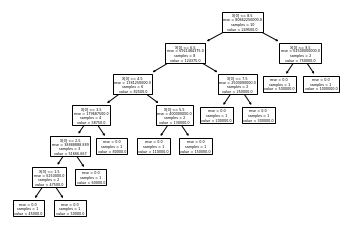

In [30]:
plot_tree(reg)
plt.show()

# new dataset

In [31]:
df = pd.read_csv('../dataset/diamond_pricing.csv')

In [32]:
x = df[['Paleonium','Pressure']]
y = df['Price']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2, random_state=0)

In [33]:
reg2 = DecisionTreeRegressor()
reg2.fit(xtrain, ytrain)
reg2.score(xtest, ytest) * 100

96.34978677528181

[]

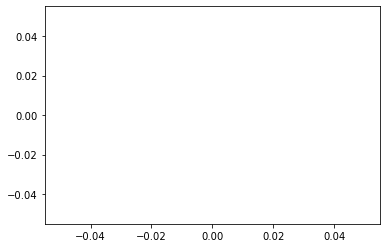

In [34]:
df['pred'] = reg2.predict(x)

In [35]:
df

,Paleonium,Pressure,Price,pred
0,17,6567,2810.280298,2810.280298
1,59,5253,1986.967089,1690.278454
2,123,9715,2083.132087,2083.132087
3,182,2073,2236.340285,2236.340285
4,133,6400,1903.323339,1903.323339
...,...,...,...,...
995,90,15039,1633.608018,1633.608018
996,49,10592,2316.189728,2288.116870
997,42,18435,1189.359047,1189.359047
998,10,13675,2922.682785,2922.682785


In [36]:
px.scatter_3d(data_frame = df,x='Paleonium', y='Pressure', z='pred', hover_name='Price')

In [37]:
df['diff'] = df['Price'] - df['pred']

In [38]:
df

,Paleonium,Pressure,Price,pred,diff
0,17,6567,2810.280298,2810.280298,0.000000
1,59,5253,1986.967089,1690.278454,296.688635
2,123,9715,2083.132087,2083.132087,0.000000
3,182,2073,2236.340285,2236.340285,0.000000
4,133,6400,1903.323339,1903.323339,0.000000
...,...,...,...,...,...
995,90,15039,1633.608018,1633.608018,0.000000
996,49,10592,2316.189728,2288.116870,28.072858
997,42,18435,1189.359047,1189.359047,0.000000
998,10,13675,2922.682785,2922.682785,0.000000


In [39]:
px.scatter_3d(data_frame = df,x='Paleonium', y='Pressure', z='pred', hover_name='Price', color = 'diff')

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [41]:
from template import save_model
save_model(reg2,'../model/diamond_price.pk')

True